<a href="https://colab.research.google.com/github/KaushikDasarii/kaushik/blob/main/XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:45:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 BEFORE Tuning
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965
ROC AUC Score: 0.9908286930887652


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:46:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 AFTER Tuning
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965
ROC AUC Score: 0.9931215198165738


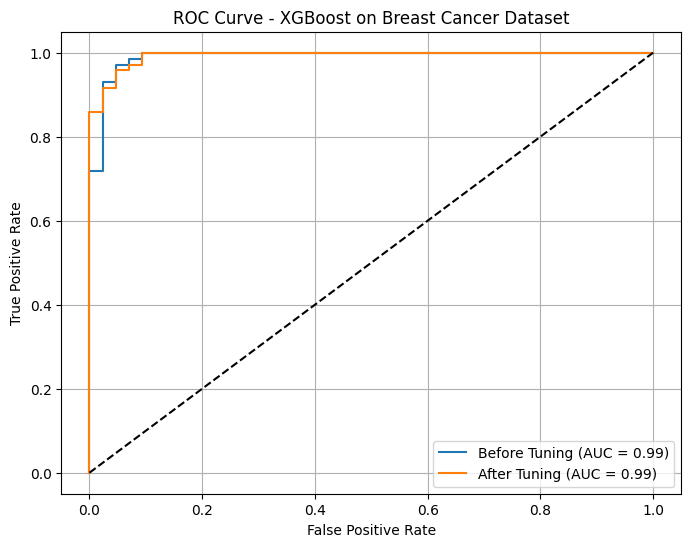

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# BEFORE Tuning
# ------------------------------
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(" BEFORE Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ------------------------------
# GridSearchCV for Tuning
# ------------------------------
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                    param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\n AFTER Tuning")
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

# ------------------------------
# ROC Curve
# ------------------------------
fpr1, tpr1, _ = roc_curve(y_test, y_proba)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label='Before Tuning (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot(fpr2, tpr2, label='After Tuning (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_best)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost on Breast Cancer Dataset")
plt.legend()
plt.grid(True)
plt.show()


 BEFORE Hyperparameter Tuning
MSE: 5165.56529638597
MAE: 55.29138714298026
R² Score: 0.8671665546216444

 AFTER Hyperparameter Tuning
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
MSE: 3621.250622245078
MAE: 48.190091899305514
R² Score: 0.906878885633704


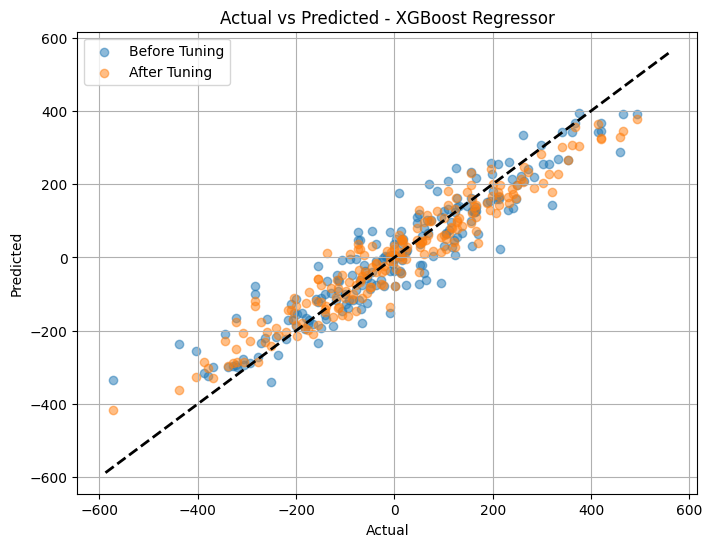

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=10, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# BEFORE Hyperparameter Tuning
# ------------------------------
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" BEFORE Hyperparameter Tuning")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# ------------------------------
# Hyperparameter Tuning with GridSearchCV
# ------------------------------
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid = GridSearchCV(XGBRegressor(random_state=42),
                    param_grid, cv=5,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n AFTER Hyperparameter Tuning")
print("Best Parameters:", grid.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))

# ------------------------------
# Plot Actual vs Predicted
# ------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Before Tuning')
plt.scatter(y_test, y_pred_best, alpha=0.5, label='After Tuning')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - XGBoost Regressor")
plt.legend()
plt.grid(True)
plt.show()
